*italicized text*##DAnce dance

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Subset_for_first_presentation.csv')

In [ ]:
df.head()

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,Value,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L)
0,1,2531,2531.0,329,L63001-3,06/17/2015 10:43:00 AM,1.0,Marine Offshore,Central Puget Sound,NSAJ02,...,0.951,mg/L,1,0.05,0.100,WHITLEDGE 1981,06/18/2015,KCEL,0 days 13:17:00,0.95100
1,3,4609,4609.0,1263,L65931-3,08/15/2016 01:22:00 PM,1.5,Marine Offshore,Central Puget Sound,LTUM03,...,17.900,PSS,1,2.00,3.000,SM2520-B,08/25/2016,KCEL,9 days 10:38:00,0.01790
2,4,2747,2747.0,58,L62666-12,05/18/2015 09:22:00 AM,196.0,Marine Offshore,Central Puget Sound,KSBP01,...,0.750,ug/L,1,0.06,0.120,CTD,05/18/2015,KCEL,-1 days +14:38:00,0.00075
3,5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,0.510,ug/L,1,0.26,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.00051
4,7,6189,6189.0,2362,L59977-3,04/22/2014 10:37:00 AM,6.7,Marine Offshore,Central Puget Sound,LTUM03,...,9.100,mg/L,1,0.10,0.500,SM4500-O-C,04/23/2014,KCEL,0 days 13:23:00,9.10000


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame.
# Load the CSV file, ensuring the first unnamed column is set as the index.

# Convert the 'Collect DateTime' column to datetime type.
df['Collect DateTime'] = pd.to_datetime(df['Collect DateTime'])

# Create new columns based on 'Collect DateTime' for more detailed time components.
df['day'] = df['Collect DateTime'].dt.day
df['month'] = df['Collect DateTime'].dt.month
df['week'] = df['Collect DateTime'].dt.isocalendar().week
df['year'] = df['Collect DateTime'].dt.year

# You can save this DataFrame or continue with further analysis.
df.to_csv('path_to_your_modified_dataset.csv', index=False)


In [ ]:
df.head()

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L),day,month,week,year
0,1,2531,2531.0,329,L63001-3,2015-06-17 10:43:00,1.0,Marine Offshore,Central Puget Sound,NSAJ02,...,0.100,WHITLEDGE 1981,06/18/2015,KCEL,0 days 13:17:00,0.95100,17,6,25,2015
1,3,4609,4609.0,1263,L65931-3,2016-08-15 13:22:00,1.5,Marine Offshore,Central Puget Sound,LTUM03,...,3.000,SM2520-B,08/25/2016,KCEL,9 days 10:38:00,0.01790,15,8,33,2016
2,4,2747,2747.0,58,L62666-12,2015-05-18 09:22:00,196.0,Marine Offshore,Central Puget Sound,KSBP01,...,0.120,CTD,05/18/2015,KCEL,-1 days +14:38:00,0.00075,18,5,21,2015
3,5,4722,4714.0,1253,L65761-5,2016-07-19 08:30:00,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.00051,19,7,29,2016
4,7,6189,6189.0,2362,L59977-3,2014-04-22 10:37:00,6.7,Marine Offshore,Central Puget Sound,LTUM03,...,0.500,SM4500-O-C,04/23/2014,KCEL,0 days 13:23:00,9.10000,22,4,17,2014


##Analysis based on Site Type

Grouped Descriptive Statistics

In [ ]:
# Calculate summary statistics for numerical data within each 'Site Type'
grouped_stats = df.groupby('Site Type').agg({
    'Depth (m)': ['mean', 'median', 'std', 'min', 'max'],
    'Value': ['mean', 'median', 'std', 'min', 'max'],
    'MDL': ['mean', 'median', 'std', 'min', 'max'],
    'RDL': ['mean', 'median', 'std', 'min', 'max']
})

print(grouped_stats)

                 Depth (m)                                     Value         \
                      mean median        std   min    max       mean median   
Site Type                                                                     
Large Lakes      14.954490   11.0  14.047425  0.00   64.0  20.282777   1.48   
Marine Offshore  37.177923   24.7  49.423617  0.26  201.0   9.974711   1.30   

                                                MDL                           \
                       std     min    max      mean median       std     min   
Site Type                                                                      
Large Lakes      36.199206  0.0005  145.0  0.419596   0.50  0.715454  0.0000   
Marine Offshore  23.597585  0.0020  318.0  0.207603   0.05  0.390307  0.0005   

                            RDL                                 
                  max      mean median       std    min    max  
Site Type                                                       
Large La

Time Series Analysis by Site Type

In [ ]:
'''# Assuming 'Value' is the metric we're interested in
site_types = df['Site Type'].unique()
plt.figure(figsize=(12, 6))
for site_type in site_types:
    site_data = df[df['Site Type'] == site_type]
    site_data['Value'].resample('M').mean().plot(label=site_type)
plt.legend()
plt.title('Monthly Average Value by Site Type')
plt.show()'''

"# Assuming 'Value' is the metric we're interested in\nsite_types = df['Site Type'].unique()\nplt.figure(figsize=(12, 6))\nfor site_type in site_types:\n    site_data = df[df['Site Type'] == site_type]\n    site_data['Value'].resample('M').mean().plot(label=site_type)\nplt.legend()\nplt.title('Monthly Average Value by Site Type')\nplt.show()"

Site Type Distribution Comparison

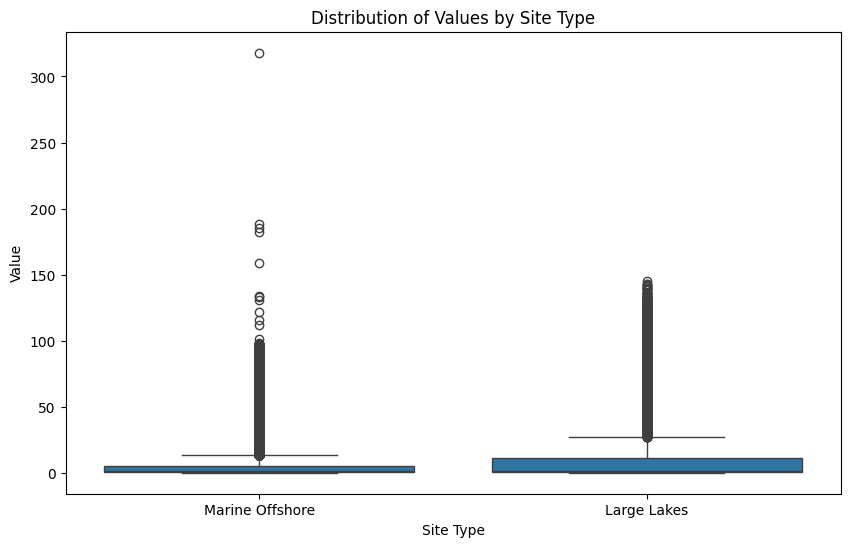

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Site Type', y='Value', data=df)
plt.title('Distribution of Values by Site Type')
plt.show()


Correlation of Measurements within Each Site Type

In [ ]:
# Getting unique site types
site_types = df['Site Type'].unique()

# Computing correlation matrices within each site type
for site_type in site_types:
    print(f"Correlation matrix for {site_type}:")
    site_data = df[df['Site Type'] == site_type]
    correlation_matrix = site_data[['Depth (m)', 'Value', 'MDL', 'RDL']].corr()
    print(correlation_matrix)
    print("\n")  # Print a newline for better readability between outputs

Correlation matrix for Marine Offshore:
           Depth (m)     Value       MDL       RDL
Depth (m)   1.000000  0.035015  0.027015  0.038195
Value       0.035015  1.000000  0.031901 -0.090298
MDL         0.027015  0.031901  1.000000  0.465825
RDL         0.038195 -0.090298  0.465825  1.000000


Correlation matrix for Large Lakes:
           Depth (m)     Value       MDL       RDL
Depth (m)   1.000000  0.021600  0.001388  0.029045
Value       0.021600  1.000000  0.377463  0.961215
MDL         0.001388  0.377463  1.000000  0.455960
RDL         0.029045  0.961215  0.455960  1.000000




### *Correlation*

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402883 entries, 0 to 402882
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              402883 non-null  int64         
 1   Sample ID               402883 non-null  int64         
 2   Grab ID                 402883 non-null  float64       
 3   Profile ID              402883 non-null  int64         
 4   Sample Number           402883 non-null  object        
 5   Collect DateTime        402883 non-null  datetime64[ns]
 6   Depth (m)               402883 non-null  float64       
 7   Site Type               402883 non-null  object        
 8   Area                    402883 non-null  object        
 9   Locator                 402883 non-null  object        
 10  Site                    402883 non-null  object        
 11  Parameter               402883 non-null  object        
 12  Value                   402883

In [ ]:
print('Value' in df.columns)

True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-94b538b1f19d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


True


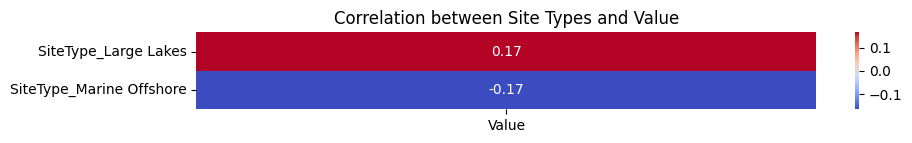

In [ ]:
site_type_encoded = pd.get_dummies(df['Site Type'], prefix='SiteType')

df_encoded = pd.concat([df, site_type_encoded], axis=1)

correlation_matrix = df_encoded.corr()

print('Value' in correlation_matrix.columns)

site_type_correlations_with_value = correlation_matrix['Value'].filter(regex='^SiteType').to_frame()

plt.figure(figsize=(10, len(site_type_correlations_with_value) / 2))
sns.heatmap(site_type_correlations_with_value.sort_values(by='Value', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Site Types and Value')
plt.show()

##Analysis based on Sample Number

Frequency Analysis of Sample Numbers

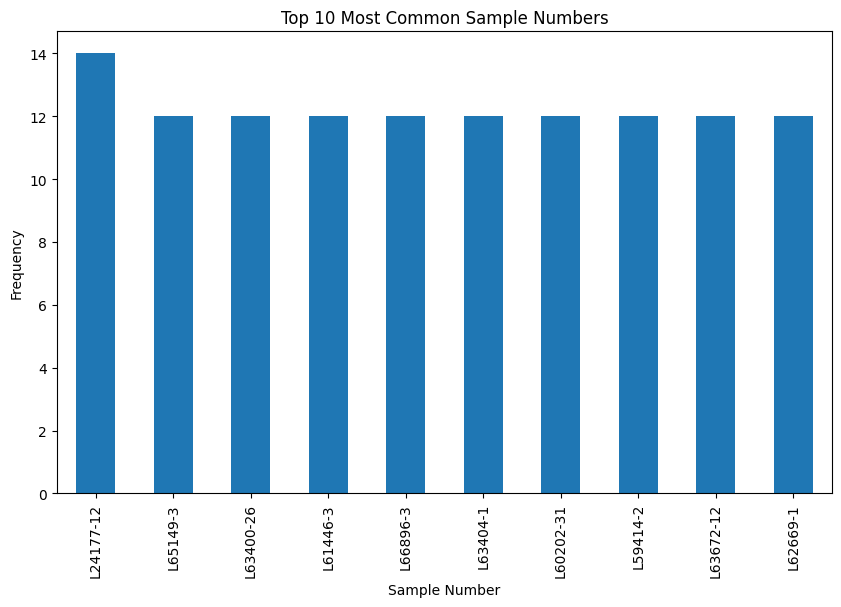

In [ ]:
sample_number_counts = df['Sample Number'].value_counts()

# Plotting the frequency of the top 10 most common sample numbers
plt.figure(figsize=(10, 6))
sample_number_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Sample Numbers')
plt.xlabel('Sample Number')
plt.ylabel('Frequency')
plt.show()

Association Rule Mining for Sample Numbers and Parameters

In [ ]:
# For simplicity, here's a conceptual code snippet
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Transforming the dataset into a format suitable for association rule mining
# Assuming each row represents a transaction and 'Sample Number' and 'Parameter' are items
dataset = df.groupby('Sample Number')['Parameter'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df2, min_support=0.1, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


                                             antecedents  \
0                                     (Ammonia Nitrogen)   
1                                        (Chlorophyll a)   
2                                 (Light Transmissivity)   
3                                     (Ammonia Nitrogen)   
4                           (Nitrite + Nitrate Nitrogen)   
...                                                  ...   
19948  (Dissolved Oxygen, Field, Total Suspended Solids)   
19949         (Nitrite + Nitrate Nitrogen, Pheophytin a)   
19950             (Total Suspended Solids, Pheophytin a)   
19951                             (Light Transmissivity)   
19952                                     (Pheophytin a)   

                                             consequents   support  confidence  
0                                        (Chlorophyll a)  0.157656    0.521100  
1                                     (Ammonia Nitrogen)  0.157656    0.559466  
2                                   

 Clustering Based on Sample Numbers and Other Features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

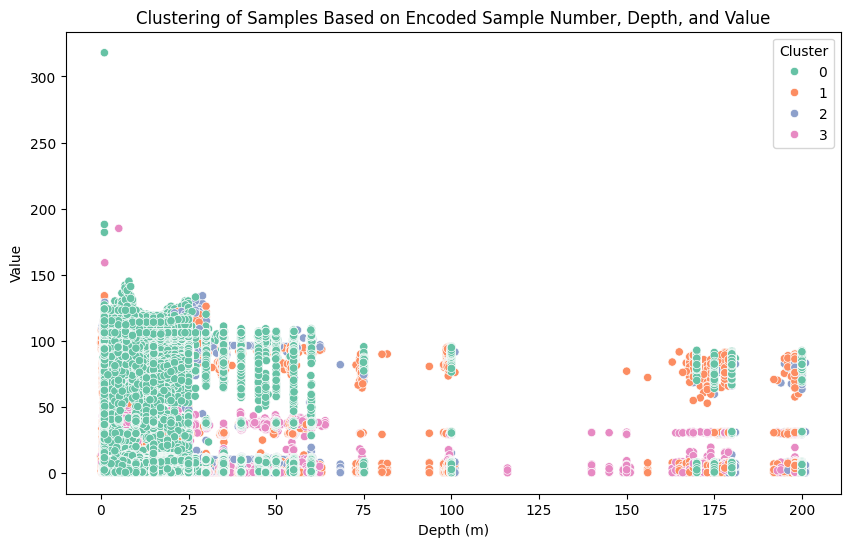

In [ ]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels for 'Sample Number'
df['Sample Number Encoded'] = label_encoder.fit_transform(df['Sample Number'])

# Use 'Sample Number Encoded' for clustering along with 'Depth (m)' and 'Value'
features = df[['Sample Number Encoded', 'Depth (m)', 'Value']]
kmeans = KMeans(n_clusters=4)

# Perform clustering
df['cluster'] = kmeans.fit_predict(features)

# Visualizing clusters
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(data=df, x='Depth (m)', y='Value', hue='cluster', palette='Set2')
plt.title('Clustering of Samples Based on Encoded Sample Number, Depth, and Value')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.show()

Text Analysis of Sample Numbers

In [ ]:
'''from collections import Counter
import re

# Extracting words from 'Sample Number' assuming it contains textual information
words = df['Sample Number'].apply(lambda x: re.findall(r'\b\w+\b', x)).sum()

# Counting word occurrences
word_counts = Counter(words)

# Displaying the most common words found in 'Sample Numbers'
print(word_counts.most_common(10))'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-14-9d7ab2ed6ac9>:1: DeprecationWarning: invalid escape sequence '\w'
  '''from collections import Counter


"from collections import Counter\nimport re\n\n# Extracting words from 'Sample Number' assuming it contains textual information\nwords = df['Sample Number'].apply(lambda x: re.findall(r'\x08\\w+\x08', x)).sum()\n\n# Counting word occurrences\nword_counts = Counter(words)\n\n# Displaying the most common words found in 'Sample Numbers'\nprint(word_counts.most_common(10))"

##Analysis on Value

Distribution Analysis of 'Value'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


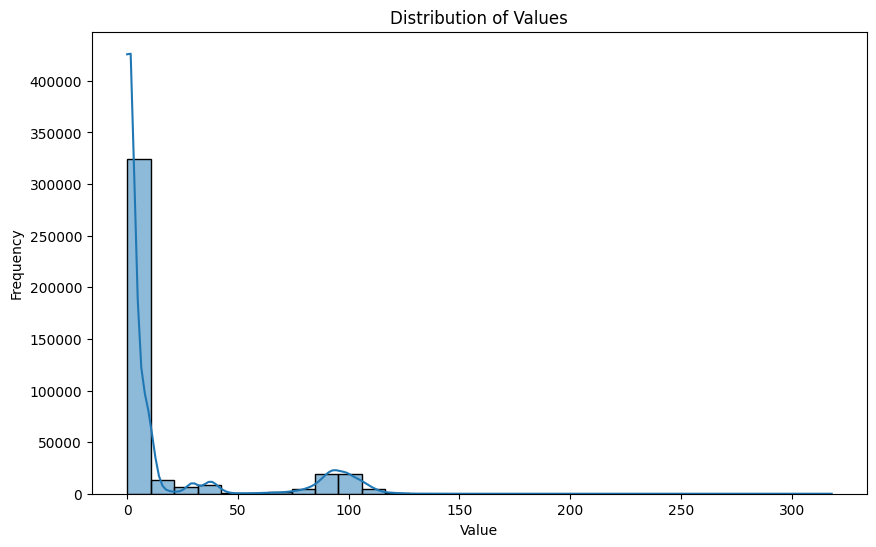

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

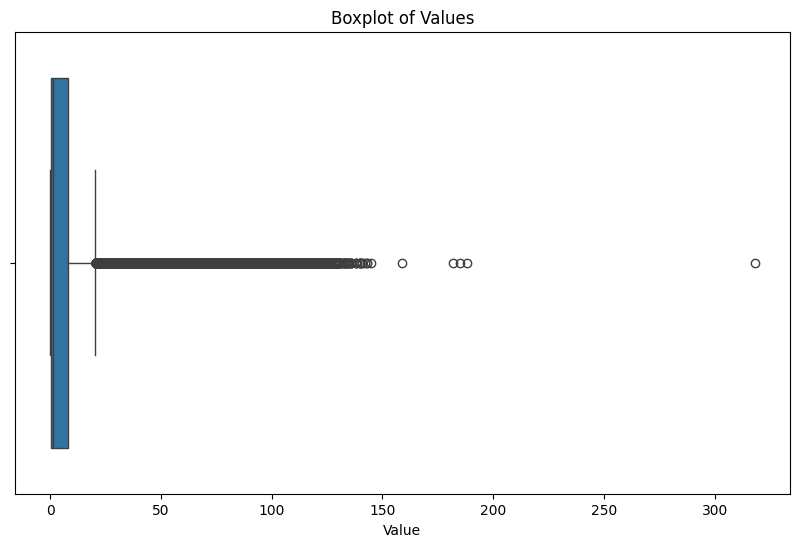

In [ ]:
# Histogram to see the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True, bins=30)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers and quartiles
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Values')
plt.xlabel('Value')
plt.show()

Quantile Analysis of 'Value'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


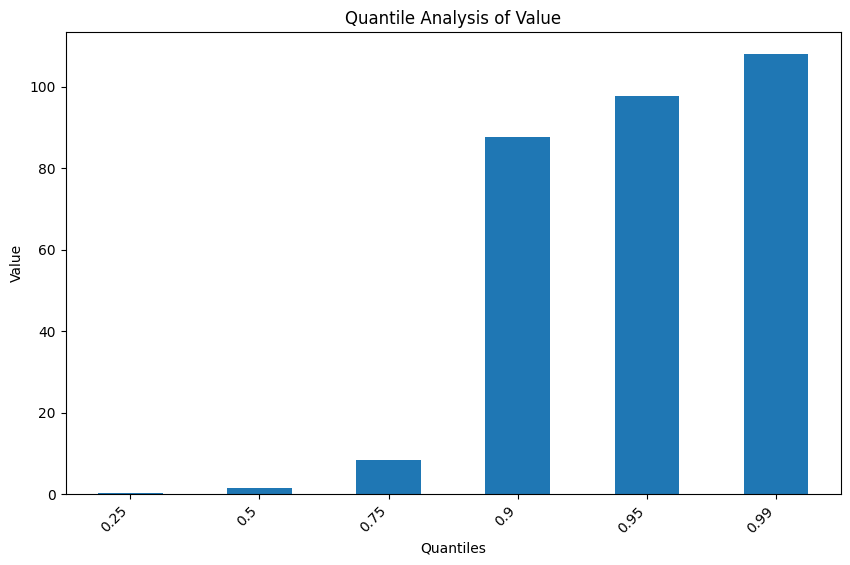

In [ ]:
# Calculating quantiles for 'Value'
quantiles = df['Value'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

# Plotting the quantile values
plt.figure(figsize=(10, 6))
quantiles.plot(kind='bar')
plt.title('Quantile Analysis of Value')
plt.xlabel('Quantiles')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.show()

Simple Moving Average for Change Point Detection


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


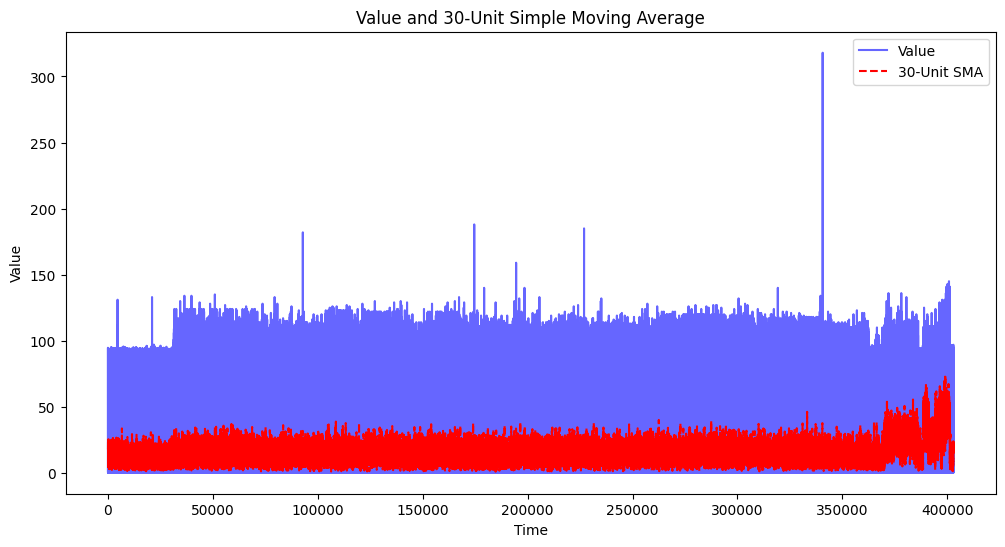

In [ ]:
# Calculate the simple moving average (SMA) with a window of, say, 30 time units (days, months, etc.)
df['SMA_30'] = df['Value'].rolling(window=30).mean()

# Plotting 'Value' and its SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Value', color='blue', alpha=0.6)
plt.plot(df['SMA_30'], label='30-Unit SMA', color='red', linestyle='--')
plt.title('Value and 30-Unit Simple Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Value-Based Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/c

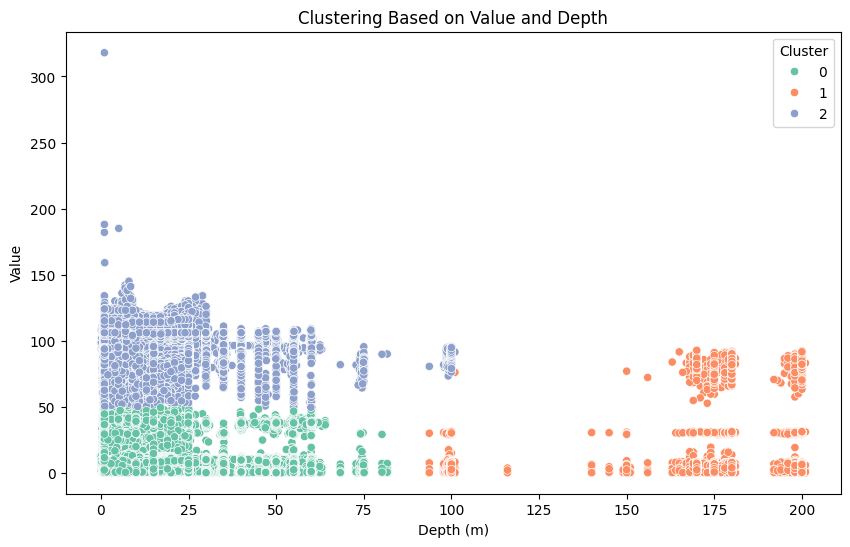

In [ ]:
# Assuming 'Value' and 'Depth (m)' are related and we want to cluster based on these
features = df[['Value', 'Depth (m)']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(features)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Depth (m)', y='Value', hue='cluster', palette='Set2')
plt.title('Clustering Based on Value and Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.show()

Variance Analysis for Potential Change Points


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


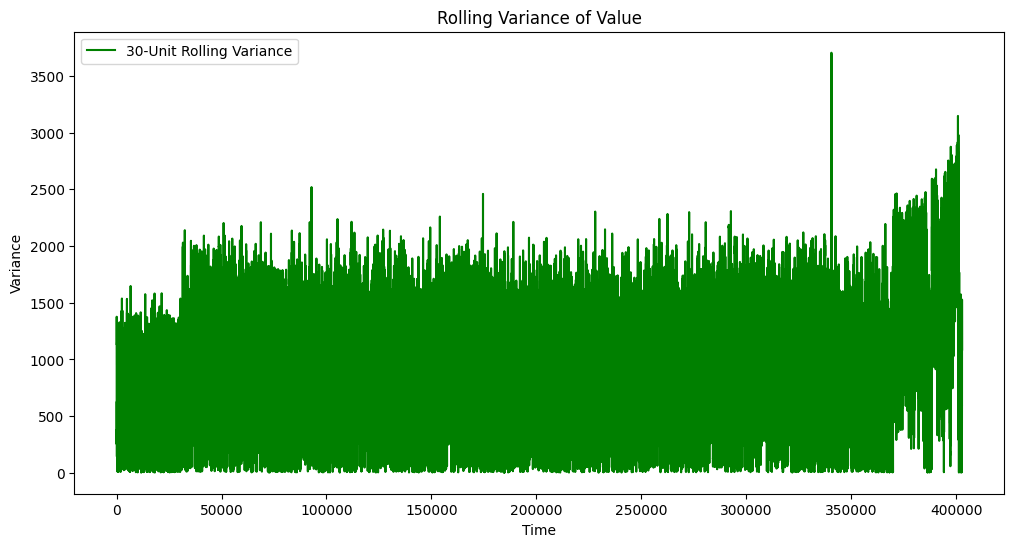

In [ ]:
# Calculate the rolling variance of 'Value' with a window of, say, 30 time units
df['Variance_30'] = df['Value'].rolling(window=30).var()

# Plotting the rolling variance
plt.figure(figsize=(12, 6))
plt.plot(df['Variance_30'], label='30-Unit Rolling Variance', color='green')
plt.title('Rolling Variance of Value')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.legend()
plt.show()
